

# Project: Investigate Brazil's no -show medical dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

<a id='intro'></a>
## Introduction

Our dataset comprises of 110527 different appointments for the year 2016, scheduled by various patients and we want to analyze which factors/ variables effect the tendency of the patients to showup/ not showup for the scheduled appointment

We will go about analyzing our dataset by taking a 4 step approach: 

1. Getting Familiarized with our dataset
2. Cleaning our data to get improve the quality and reliability of our analysis
3. Asking questions and analyzing our dataset in line with these questions
4. Stating conclusions and limitations of our analysis

Importing all the necessary libraries required to perform the analysis

In [194]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
% matplotlib inline 
import matplotlib.pyplot as plt



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

We will dive into our dataset and get familiar with it using pandas and related functions


### General Properties

Reading the dataset 

In [195]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.


df = pd.read_csv('No_Show.csv')
df.head()


,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning

 We will now clean our dataset and analyze whether it has null, duplicates and correct datatypes. We will proceed if our intial dataset doesn't have these. If in case our dataset has one of the aforementioned problems, we will first fix it and then proceed to asking questions. 

In [196]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Checking for duplicates and non - null values 
df.info()
sum(df.duplicated())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
ch                110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

1. There are no null types in the given data
2. There are no dublicates in the dataset


We will convert both, the scheduled and the application date, into datetime format. 

Although our dataset does not contain any null values, duplicates, we need to check for other inconsistencies in our data

1. In a few cases, appointment date is before the scheduled date. This might be because of two reasons : either the appointment was rescheduled and the data was not updated or it may be a data entry error. In this case, we need to remove  that data.

In [198]:
#Converting both Scheduled and Appointment date into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
ch                110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [200]:
#Checking for rows which have scheduled date greater than the appointment date
df1 = df[df['ScheduledDay']>df['AppointmentDay']]
df1

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
8,5.639470e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
19,7.223290e+12,5640433,F,2016-04-29 10:43:14,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No
24,8.734860e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No
26,2.578785e+10,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
28,5.926170e+12,5642400,M,2016-04-29 15:48:02,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No


There are 38,560 such rows and we will remove them to improve the quality of our data

In [201]:
df.drop(df1.index, axis=0,inplace=True)

In [202]:
df

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598510e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,7.812460e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345360e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
11,7.542950e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
12,5.666550e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No
13,9.113950e+14,5636249,M,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,No
14,9.988470e+13,5633951,F,2016-04-28 10:06:24,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 14 columns):
ch                71959 non-null float64
AppointmentID     71959 non-null int64
Gender            71959 non-null object
ScheduledDay      71959 non-null datetime64[ns]
AppointmentDay    71959 non-null datetime64[ns]
Age               71959 non-null int64
Neighbourhood     71959 non-null object
Scholarship       71959 non-null int64
Hipertension      71959 non-null int64
Diabetes          71959 non-null int64
Alcoholism        71959 non-null int64
Handcap           71959 non-null int64
SMS_received      71959 non-null int64
No-show           71959 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 8.2+ MB


In the above informtion, we see that the required data has been removed

2. Now we will remove those rows in which the "Age" column contains values such as -1 and 0. We will only accept non - negative values in the age column  

In [203]:
# Checking for rows which have age less than or equal to zero
df2 = df[df['Age']<=0]
df2

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63,2.366230e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885170e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718820e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
104,3.326990e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468590e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
193,2.379700e+11,5532452,F,2016-03-31 11:14:57,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,1,No
194,4.442540e+11,5539566,M,2016-04-01 15:17:10,2016-04-29,0,REDENÇÃO,0,0,0,0,0,0,No
256,8.599713e+10,5629906,F,2016-04-27 14:19:02,2016-04-29,0,ARIOVALDO FAVALESSA,0,0,0,0,0,0,Yes
358,7.349270e+14,5531831,F,2016-03-31 10:07:18,2016-04-29,0,CONSOLAÇÃO,0,0,0,0,0,0,Yes
359,7.975280e+11,5551583,M,2016-04-06 14:20:30,2016-04-29,0,CONSOLAÇÃO,0,0,0,0,0,0,No


There are 2131 such rows and we will remove them from our dataset to improve the quality of our data

In [204]:
df.drop(df2.index, axis = 0, inplace= True)

In [205]:
df[df['Age']<=0]

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


As can be seen from the data, no such values exist in our database for which age is less or equal to zero 

3. Finally, we will remove values greater than 1 in the handicap column 

In [206]:
#Checking for rows which have values under handicap value greater than 1
df3 = df[df['Handcap'] > 1]
df3

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282580e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242920e+13,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242920e+13,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2673,4.415270e+13,5589893,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555220e+12,5689883,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,0,No
5475,5.662980e+14,5689889,F,2016-05-12 09:10:50,2016-05-16,34,JUCUTUQUARA,0,0,0,0,2,0,Yes
5485,6.878630e+13,5663683,F,2016-05-05 10:23:26,2016-05-09,16,SANTA TEREZA,0,0,0,0,2,0,No
5510,4.695960e+14,5658406,F,2016-05-04 11:06:48,2016-05-05,42,SÃO PEDRO,0,1,0,0,2,0,No
6067,7.543390e+12,5705981,F,2016-05-17 07:41:55,2016-05-19,10,RESISTÊNCIA,0,0,0,0,2,0,Yes


As we can see, there are 122 rows which contain a value more than 1 for the handicap column. We will remove these values to improve the quality of our dataset.

In [207]:
#removing those values 
df.drop(df3.index, axis = 0, inplace = True)

In [208]:
df[df['Handcap'] > 1]

,ch,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


As can be seen, the handicap column containing values greater than 2 have been removed.

We have now cleaned our dataset. We will proceed to the data analysis part.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69706 entries, 5 to 110526
Data columns (total 14 columns):
ch                69706 non-null float64
AppointmentID     69706 non-null int64
Gender            69706 non-null object
ScheduledDay      69706 non-null datetime64[ns]
AppointmentDay    69706 non-null datetime64[ns]
Age               69706 non-null int64
Neighbourhood     69706 non-null object
Scholarship       69706 non-null int64
Hipertension      69706 non-null int64
Diabetes          69706 non-null int64
Alcoholism        69706 non-null int64
Handcap           69706 non-null int64
SMS_received      69706 non-null int64
No-show           69706 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 8.0+ MB


The cleaned dataset contains 69706 rows and 14 columns 

# <a id='eda'></a>
## Exploratory Data Analysis





# Asking Questions

We will now ask questions based on the parameters present in our dataset. Number of "No- show" is our dependent variable and other parameters such as "Age", "Scheduled, Appointment Day", "Scholarship" are our independent variables

Q1. Does Scheduled Day and Appointment Day affect the number of no - shows? If yes, how? 

Q2. Does a particular month affect the number of no - shows? If yes, how?

Q3. Does age affect the number of no - shows? If yes, how

Q4. Does gender affect the number of no - shows? If yes, how

Q5. Does scholarship affect the number of no - shows? If yes, how

Q6. Is there any relationship between hypertension and no - shows? 

Q7. Is there any relationship between diabetes and no - shows? 

Q8. Is there any relationship between alcohol and no - shows? 

Q9. Is there any relationship between disability and no - shows? 

Q10. Does receiving SMSs affect the number of no - shows? If yes, how

Q11. How does the monthly no - show rate change when 'hypertension', 'diabetes', 'alcohol' and 'disability' are considered together?

Q12. How does the monthly no - show rate change when 'Scholarship' and 'SMS Received' are considered together?

Q13. How does the daily no - show rate change when 'hypertension', 'diabetes', 'alcohol' and 'disability' are considered together?

Q.14 How does the daily no - show rate change when both genders are considered together?

Q.15 How does the monthly no - show rate change when people from all age groups are considered together?

# 1. Effect of scheduled day and appointment day on no - show 

shed_weekday1
0    69.981558
1    71.253287
2    72.857143
3    72.523142
4    70.571804
5    70.967742
dtype: float64

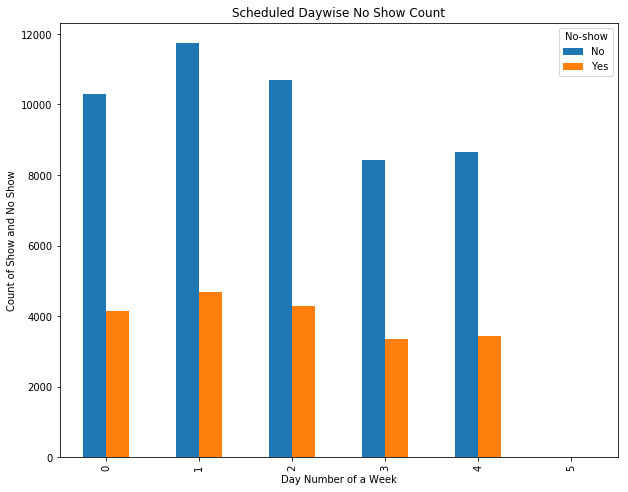

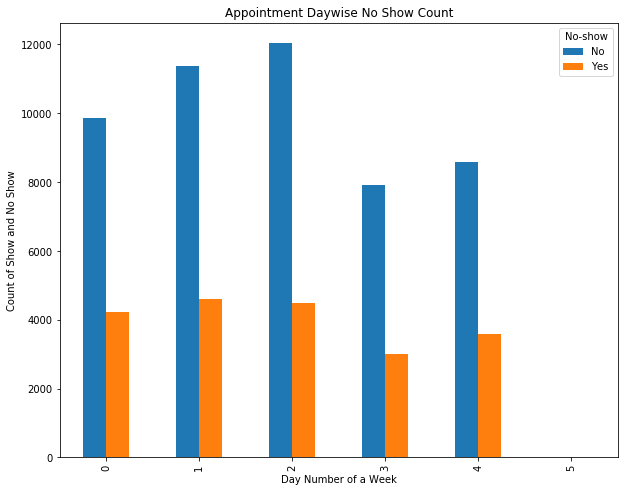

In [210]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


# extracting day of the week from the scheduled day
df['shed_weekday'] = pd.to_datetime(df['ScheduledDay']).apply(lambda x: x.weekday())
# function for converting "Yes/No" values under no show columns to "0/1"
def replace(value):
    if value == 'No':
        return 0
    if value == 'Yes':
        return 1
df['int_noshow'] = df['No-show'].apply(replace)
df.head()

#plotting the required charts 
plot1 = df.groupby(['shed_weekday','No-show'],axis = 0 ).count()['int_noshow'].unstack().plot(figsize = (10,8), kind = 'bar', title = 'Days', )
plot1.set_xlabel("Day Number of a Week")
plot1.set_ylabel("Count of Show and No Show")
plot1.set_title("Scheduled Daywise No Show Count")


# extracting day of the week from the scheduled day
## Appointment Day 
df['shed_weekday1'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.weekday())
def replace(value):
    if value == 'No':
        return 0
    if value == 'Yes':
        return 1
df['int_noshow1'] = df['No-show'].apply(replace)
df.head()

#plotting the required charts 
plot1 = df.groupby(['shed_weekday1','No-show'],axis = 0 ).count()['int_noshow1'].unstack().plot(figsize = (10,8), kind = 'bar', title = 'Days', )
plot1.set_xlabel("Day Number of a Week")
plot1.set_ylabel("Count of Show and No Show")
plot1.set_title("Appointment Daywise No Show Count")


#calculating the no-show rate for different days of the week 
df.groupby(['shed_weekday1','No-show'],axis = 0 ).count()['int_noshow1'].unstack()['No']*100/(df.groupby(['shed_weekday1','No-show'],axis = 0 ).count()['int_noshow1'].unstack()['Yes'] + df.groupby(['shed_weekday1','No-show'],axis = 0 ).count()['int_noshow1'].unstack()['No'])

















Inference
1. Maximum appointments were made on Tuesdays and Wednesdays whereas minimum on Monday and Saturday respectively. 
2. In both the cases, it can be seen that the maximum people attended the scheduled appointments on Wednesdays and Thurdays with respect to the total booked appointments. 
3. Additionally, maximum no shows, with respect to the total booked appointments occurred on Mondays, Fridays and Saturdays, just before and after the weekends. 

 Hypothesis 
1. People book their appointments during the weekdays (mid) as it is much easier for them to visit the medical facility after/before office hours and they do not like to go out and spend their weekends on medical appointments on weekends 
2. People stay committed to the appointments during the weekdays and have a higher probability of attending the appointment during the weekdays
3. Although the people book the appointment during weekends, Mondays and Fridays, they are less likely to attend these appintment in comparison to appointments booked on middle weekdays.

# 2. Effect of Month on No - Show appointments

month
4    72.367794
5    70.620456
6    73.857838
dtype: float64

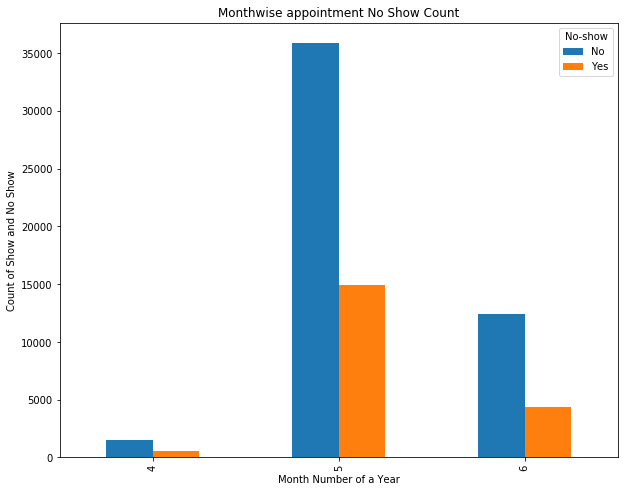

In [211]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

##2. Effect of appointment month on no - show 
#Extracting month from the appointment date 
df['month'] = pd.to_datetime(df['AppointmentDay']).dt.month
df['month']


# Plotting the required graph 
plot3 = df.groupby(['month','No-show'],axis = 0).count()['int_noshow'].unstack().plot(figsize = (10,8), kind = 'bar', title = 'Days', )
plot3.set_xlabel("Month Number of a Year")
plot3.set_ylabel("Count of Show and No Show")
plot3.set_title("Monthwise appointment No Show Count")

# Calculating the now - show rate for different month of the year 
df.groupby(['month','No-show'],axis = 0 ). count()['int_noshow'].unstack()['No']*100/(df.groupby(['month','No-show'],axis = 0 ). count()['int_noshow'].unstack()['No']+df.groupby(['month','No-show'],axis = 0 ). count()['int_noshow'].unstack()['Yes'])






Inference : Maximum appointments are made in the month of May and people are most likely to honour their appointments made if they are made in the month of May and June. April, being the end of financial year, keeps people more occupied than expected, and thus people are unable to honour the appointment made by them in the month of April. 

Hypothesis : During summer season (May and June), maximum number of appointments are scheduled and people are most likely to show up to these appointments during these months.

# 3.Effect of Age on No - Show appointments

age_divide
Adult    66.501014
Old      76.217063
Young    66.789866
dtype: float64

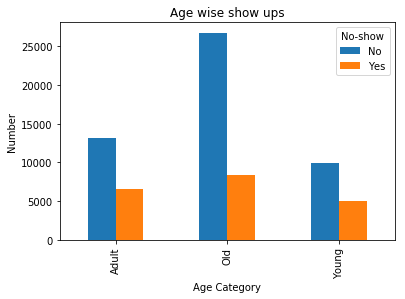

In [212]:
# function for catgorizing the applicants into different age groups
def agedivide(age):
    if age <= 18:
        return 'Young'
    if 18 < age < 40:
        return 'Adult'
    if age >=40:
        return 'Old'
    
# applying that function 

df['age_divide'] = df['Age'].apply(agedivide)


# plotting the required graphs
plot4 = df.groupby(['age_divide', 'No-show']).count()['int_noshow1'].unstack().plot(kind = 'bar')
plot4.set_title('Age wise show ups')
plot4.set_xlabel('Age Category')
plot4.set_ylabel('Number')

#calculating the no-show rate for different age groups
df.groupby(['age_divide', 'No-show']).count()['int_noshow1'].unstack()['No']*100/(df.groupby(['age_divide', 'No-show']).count()['int_noshow1'].unstack()['No'] + df.groupby(['age_divide', 'No-show']).count()['int_noshow1'].unstack()['Yes'])



Inference
1. Old people take the maximum appointment, then the adults, followed by the young ones
2. Old people the ones who honor their appointment and have high show up rates

Hypothesis
1. As adults have jobs and are working, they are not able to honor their scheduled appointments in comparison to young and the old people 

# 4. Effect of Gender on No - Show

Gender
F    71.561508
M    71.237635
dtype: float64

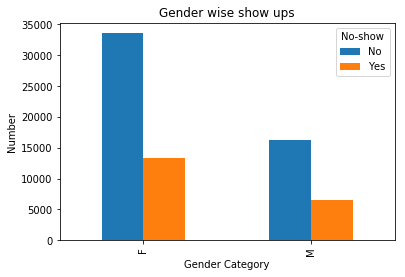

In [213]:
#plotting the required graphs for gender
plot5 = df.groupby(['Gender','No-show'], axis = 0).count()['int_noshow1'].unstack().plot(kind = 'bar')
plot5.set_title('Gender wise show ups')
plot5.set_xlabel('Gender Category')
plot5.set_ylabel('Number')
#calculating the gender no-show rate for the two gender groups
df.groupby(['Gender','No-show'], axis = 0).count()['int_noshow1'].unstack()['No']*100/(df.groupby(['Gender','No-show'], axis = 0).count()['int_noshow1'].unstack()['No']+ df.groupby(['Gender','No-show'], axis = 0).count()['int_noshow1'].unstack()['Yes'])


Inference 
1. More number of females show up to the scheduled appointments when compared to men 
2. % of women showing up is a fraction higher that that of men 

Hypothesis 
1. Females care more about their health and book more appointments as compared to men. They honor their appointments almost at the same rate as that of men.

# 5. Effect of Scholarship on No - Show

scholarship_new
no_scholarship    64.969113
sholarship        72.138452
dtype: float64

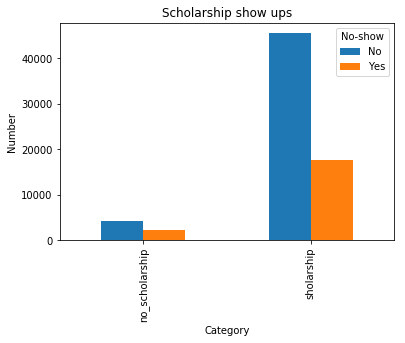

In [214]:
#segregating the applicants into two groups. One who reeived scholarships. The other who did not.
def scholarship(s):
    if s == 0:
        return 'sholarship'
    else:
        return 'no_scholarship'
df['scholarship_new'] = df['Scholarship'].apply(scholarship)
#plotting the required graphs 
plot6 = df.groupby(['scholarship_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot6.set_title('Scholarship show ups')
plot6.set_xlabel('Category')
plot6.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['scholarship_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['scholarship_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['scholarship_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])


Inference:
1. Significantly more number of people who get scholarship take medical appointments than those who do not get any scholarship 
2. People who get scholarship are less likely to not show up on their appointments as compared to those who do not 

Hypothesis
1. People who get scholarship are more likely to show up on their scheduled appointments than people who don't 

# 6. Effect of Hypertension on No - show 

hypertension_new
hypertension       70.067058
no_hypertension    76.530680
dtype: float64

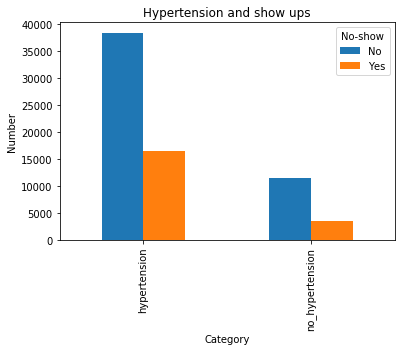

In [215]:
#segregating the applicants into two groups. One who were suffering from hypertension and the other who weren't
def tension(s):
    if s == 0:
        return 'hypertension'
    else:
        return 'no_hypertension'
df['hypertension_new'] = df['Hipertension'].apply(tension)
#plotting the required charts 
plot7 = df.groupby(['hypertension_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot7.set_title('Hypertension and show ups')
plot7.set_xlabel('Category')
plot7.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['hypertension_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['hypertension_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['hypertension_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])


Inference 
1. People with hypertension take more appointments than people without it. 


Conclusion 
1. People without hypertension are more likely to attend to their appointments than people suffering from it. 

# 7. Effect of Diabetes No - show 

diabetic_new
diabetic        71.156655
not_diabetic    75.056096
dtype: float64

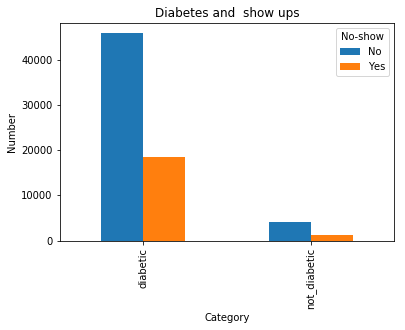

In [216]:
#segregating the applicants into two groups. One who were suffering from diabetes and the other who weren't
def diabetes(s):
    if s == 0:
        return 'diabetic'
    else:
        return 'not_diabetic'
df['diabetic_new'] = df['Diabetes'].apply(diabetes)
#plotting the required charts
plot8 = df.groupby(['diabetic_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot8.set_title('Diabetes and  show ups')
plot8.set_xlabel('Category')
plot8.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['diabetic_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['diabetic_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['diabetic_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])


Inference 
1. People with diabetes take significantly more appointments than people without it. 

Conclusion 
1. People without diabetes are more likely to attend to their appointments than people suffering from it. 

# 8. Effect of Alcohol No - show 

alcoholic_new
alcoholic        71.604484
not_alcoholic    65.895317
dtype: float64

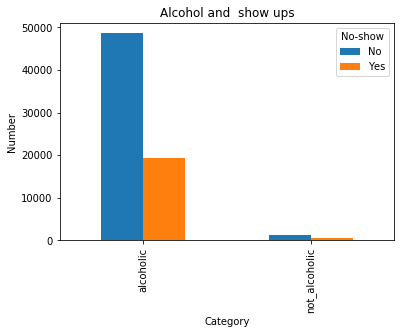

In [217]:
#segregating the applicants into two groups. One who were alcoholics and the others who were not 
def alcohol(s):
    if s == 0:
        return 'alcoholic'
    else:
        return 'not_alcoholic'
df['alcoholic_new'] = df['Alcoholism'].apply(alcohol)
#plotting the required charts 
plot9 = df.groupby(['alcoholic_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot9.set_title('Alcohol and  show ups')
plot9.set_xlabel('Category')
plot9.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['alcoholic_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['alcoholic_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['alcoholic_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])

Inference 
1. Alcoholic people take significantly more appointments than people who are not.

Conclusion 
1. Alcoholic people are more likely than non - alcoholics to attend their appointments 

# 9. Effect of Disability on  No - show 

handicap_new
handicap        71.395631
not_handicap    74.936709
dtype: float64

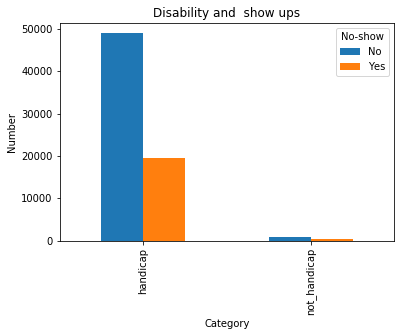

In [218]:
#segregating the applicants into two groups. One who were handicaps and the others who were not
def disable(s):
    if s == 0:
        return 'handicap'
    else:
        return 'not_handicap'
df['handicap_new'] = df['Handcap'].apply(disable)
#plotting the required charts 
plot10 = df.groupby(['handicap_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot10.set_title('Disability and  show ups')
plot10.set_xlabel('Category')
plot10.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['handicap_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['handicap_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['handicap_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])

Inference 
1. People with disability take significantly more appointments than people without it. 

Conclusion 
1. Disable people are less likely to attend to their appointments than people who are not.

# 10. Effect of Sending SMS on  No - show 

SMS_new
No_SMS    72.323238
SMS       70.603958
dtype: float64

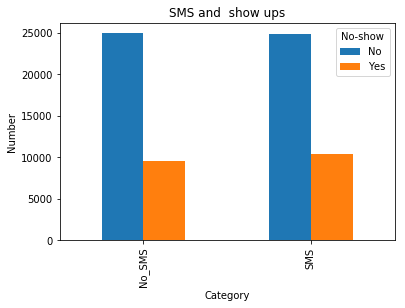

In [224]:
#segregating the applicants into two groups. One who received SMS and the others who did not 
def sms(s):
    if s == 0:
        return 'SMS'
    else:
        return 'No_SMS'
df['SMS_new'] = df['SMS_received'].apply(sms)
#plotting the required graphs 
plot11 = df.groupby(['SMS_new','No-show'], axis = 0).count().unstack()['int_noshow'].plot(kind = 'bar')
plot11.set_title('SMS and  show ups')
plot11.set_xlabel('Category')
plot11.set_ylabel('Number')
#calculating the no-show rate for the two groups
df.groupby(['SMS_new','No-show'], axis = 0).count().unstack()['int_noshow']['No']*100/(df.groupby(['SMS_new','No-show'], axis = 0).count().unstack()['int_noshow']['No'] + df.groupby(['SMS_new','No-show'], axis = 0).count().unstack()['int_noshow']['Yes'])

Conclusion 
1. People who receive SMS are no more likely to show up on their appointment than people who do not. 

# 11. Effect of all the factors combined on No - show up rate - Monthwise  

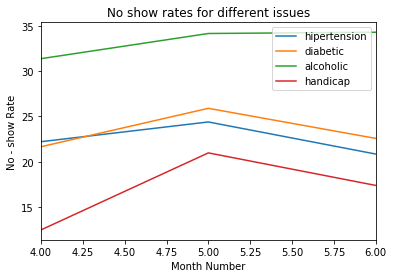

In [225]:
#extracting month from the appointment date
df['month1'] = pd.to_datetime(df['AppointmentDay']).dt.month
#Calculating the no - show rates for different groups in a panda series 
hypertension_rateseries = df.groupby(['month1','No-show']).sum().unstack()['Hipertension']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['Hipertension']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['Hipertension']['No'])
diabetes_rateseries =  df.groupby(['month1','No-show']).sum().unstack()['Diabetes']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['Diabetes']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['Diabetes']['No'])
alcohol_rateseries = df.groupby(['month1','No-show']).sum().unstack()['Alcoholism']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['Alcoholism']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['Alcoholism']['No'])
handicap_rateseries = df.groupby(['month1','No-show']).sum().unstack()['Handcap']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['Handcap']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['Alcoholism']['No'])
#Concatenating the series and Plotting the required charts 
plot7 = pd.concat([hypertension_rateseries, diabetes_rateseries, alcohol_rateseries, handicap_rateseries], axis=1).plot()
plot7.set_title("No show rates for different issues")
plot7.set_xlabel("Month Number")
plot7.set_ylabel("No - show Rate")
plot7.legend(['hipertension', 'diabetic','alcoholic', 'handicap'])


Inference: 
1. Alcoholism has a significantly higher no-show rate throughout the year.
2. The maximum no -show rate in each category is observed in the month of May 

# 12.Effect of SMS and scholarship on No - Show Rates - Monthwise 


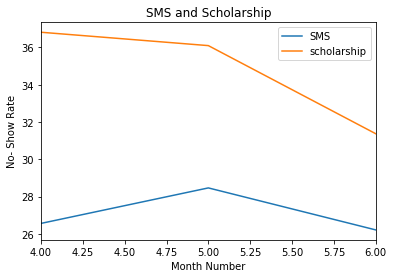

In [226]:
#Calculating the no - show rates for different groups in a panda series 
sms_series = df.groupby(['month1','No-show']).sum().unstack()['SMS_received']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['SMS_received']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['SMS_received']['No'])
scholarship_series =  df.groupby(['month1','No-show']).sum().unstack()['Scholarship']['Yes']*100/(df.groupby(['month1','No-show']).sum().unstack()['Scholarship']['Yes'] + df.groupby(['month1','No-show']).sum().unstack()['Scholarship']['No'])
#concatenating both series
concatenated_series = pd.concat([sms_series,scholarship_series], axis = 1)
#plotting the required charts 
plt = concatenated_series.plot()
plt.set_title('SMS and Scholarship')
plt.set_xlabel('Month Number')
plt.set_ylabel('No- Show Rate')
plt.legend(['SMS', 'scholarship'])

 Inference 
 1. People who received Scholarships have a higher no -show rte than people who received SMS
 2. Receiving SMS is a better way to lower no -show rate 

# 13. Effect of all the factors combined on No - show up rate - Daywise 

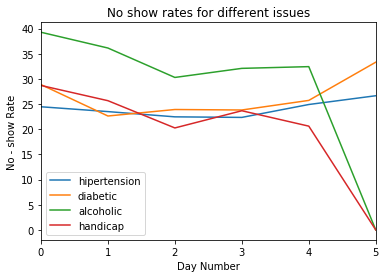

In [191]:
# extracting day from the appointment date
df['day'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.weekday())
#Calculating the no - show rates for different groups in a panda series
hypertension_series = df.groupby(['day','No-show']).sum().unstack()['Hipertension']['Yes']*100/(df.groupby(['day','No-show']).sum().unstack()['Hipertension']['Yes'] + df.groupby(['day','No-show']).sum().unstack()['Hipertension']['No'])
diabetes_series =  df.groupby(['day','No-show']).sum().unstack()['Diabetes']['Yes']*100/(df.groupby(['day','No-show']).sum().unstack()['Diabetes']['Yes'] + df.groupby(['day','No-show']).sum().unstack()['Diabetes']['No'])
alcohol_series = df.groupby(['day','No-show']).sum().unstack()['Alcoholism']['Yes']*100/(df.groupby(['day','No-show']).sum().unstack()['Alcoholism']['Yes'] + df.groupby(['day','No-show']).sum().unstack()['Alcoholism']['No'])
handicap_series = df.groupby(['day','No-show']).sum().unstack()['Handcap']['Yes']*100/(df.groupby(['day','No-show']).sum().unstack()['Handcap']['Yes'] + df.groupby(['day','No-show']).sum().unstack()['Alcoholism']['No'])
# concatenating the series and plotting the required charts 
plot7 = pd.concat([hypertension_series,diabetes_series ,alcohol_series, handicap_series], axis=1).plot()
plot7.set_title("No show rates for different issues")
plot7.set_xlabel("Day Number")
plot7.set_ylabel("No - show Rate")
plot7.legend(['hipertension', 'diabetic','alcoholic', 'handicap'])

Inference 
1.Alcoholic no show rate decrease throughout the week and is the highest for most of the week
2.High no show rate for diabetic and hipertension on Saturdays whereas low no show rate for handicaps and alcoholics on Saturday 

# 14. Effect of  Gender on No - show up rate - Day - wise

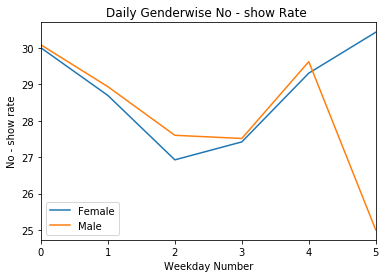

In [192]:
#Calculating the no - show rates for different groups in a panda series
female_series = df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['F']['Yes']*100/(df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['F']['Yes'] + df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['F']['No'])
male_series = df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['M']['Yes']*100/(df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['M']['Yes'] + df.groupby(['day','No-show','Gender']).count().unstack().unstack()['int_noshow']['M']['No'])
#Concatenating the series and plotting the required charts 
concatenate = pd.concat([female_series,male_series], axis = 1)
#plotting the required graphs 
plot9 = concatenate.plot()
plot9.set_title("Daily Genderwise No - show Rate ")
plot9.set_xlabel("Weekday Number")
plot9.set_ylabel("No - show rate")
plot9.legend(['Female', 'Male'])

Inference 
1. Females have a very high no show rate on Saturday and comparatively low no - show rate during the week
2. Men has a very low no - show rate on the weekends


# 15. Effect of  Age on No - show up rate - Day - wise

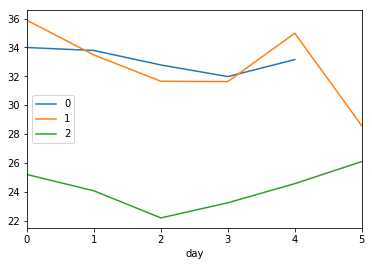

In [193]:
#Calculating the no - show rates for different groups in a panda series
young = df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Young']['Yes']*100/(df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Young']['Yes'] + df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Young']['No'])
adult = df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Adult']['Yes']*100/(df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Adult']['Yes'] + df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Adult']['No'])
old = df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Old']['Yes']*100/(df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Old']['Yes'] + df.groupby(['day','No-show','age_divide']).count().unstack().unstack()['int_noshow']['Old']['No'])
concat = pd.concat([young,adult,old], axis = 1)
#Concatenating the series and plotting the required charts
plo10 = concat.plot()
plot10.set_title('Daily agewise no - show rate')
plot10.set_xlabel('Day Number')
plot10.set_ylabel('No Show Rate')
plot10.legend(['Young','Adult','Old'])


Inference
1. Old people have the lowest noshow rate overall
2. Adults have the highest noshow ratio, just before and after the weekends
3. Young people have the lowest no show rate on Tuesdays and Wednesdays

# Final Conclusions 

1.More SMS should be used as an incentive to minimize no show up rates, especially in the month of May. Scholarships should also be given candidates about for scheduled appointment to reduce no show rates. 

2.Alcoholics should be strictly penalised to reduce the no - show rates among alcoholics

3.Male adults should be encouraged to book appointments on weekends whereas women, old and children should be encourage to take appointments on weekdays 

4.Diabetic and people suffering from hypertension should be encourage to take appointments during weekdays  

5.Alcoholics and handicaps should be advised to take appointments on weekends

6.More attention should be geared towards people suffering from depression as they are significantly more than the people going through other problems

# Limitations

1.As the appointment data includes only 3 months data, i.e. April, May and June, predictions about the entire year cannot be made accurately

2.Predictions/Conclusions based on gender might not be accurate as majority of the people in our dataset are females 

3.Predictions/Conclusions based on age might not be accurate as majority of the people in our dataset are old

4.No predictions can be made for the date which was removed from the dataset to improve its quality 